In [108]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# from google.colab import drive
# drive.mount('/content/drive')

In [109]:
# trainFile = "E:/SJSU - Grad/Spring 23/255/Project/data/train_new.csv"
# testFile = "E:/SJSU - Grad/Spring 23/255/Project/data/test_new.csv"

trainFile = "E:/SJSU - Grad/Spring 23/255/Project/data/train.csv"
testFile = "E:/SJSU - Grad/Spring 23/255/Project/data/test.csv"

test_data = pd.read_csv(testFile)
train_data = pd.read_csv(trainFile)

In [4]:
train_data.shape

(713605, 30)

In [5]:
test_data.shape

(178402, 30)

In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713605 entries, 0 to 713604
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OBJECTID                    713605 non-null  int64  
 1   FOD_ID                      713605 non-null  int64  
 2   FPA_ID                      713605 non-null  object 
 3   SOURCE_SYSTEM_TYPE          713605 non-null  object 
 4   SOURCE_SYSTEM               713605 non-null  object 
 5   NWCG_REPORTING_AGENCY       713605 non-null  object 
 6   NWCG_REPORTING_UNIT_ID      713605 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME    713605 non-null  object 
 8   SOURCE_REPORTING_UNIT       713605 non-null  object 
 9   SOURCE_REPORTING_UNIT_NAME  713605 non-null  object 
 10  FIRE_NAME                   711357 non-null  object 
 11  FIRE_YEAR                   713605 non-null  int64  
 12  DISCOVERY_DATE              713605 non-null  float64
 13  DISCOVERY_DOY 

In [7]:
train_data.dtypes

OBJECTID                        int64
FOD_ID                          int64
FPA_ID                         object
SOURCE_SYSTEM_TYPE             object
SOURCE_SYSTEM                  object
NWCG_REPORTING_AGENCY          object
NWCG_REPORTING_UNIT_ID         object
NWCG_REPORTING_UNIT_NAME       object
SOURCE_REPORTING_UNIT          object
SOURCE_REPORTING_UNIT_NAME     object
FIRE_NAME                      object
FIRE_YEAR                       int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                   int64
DISCOVERY_TIME                  int64
STAT_CAUSE_CODE               float64
STAT_CAUSE_DESCR               object
CONT_DATE                     float64
CONT_DOY                      float64
CONT_TIME                       int64
FIRE_SIZE                     float64
FIRE_SIZE_CLASS                object
LATITUDE                      float64
LONGITUDE                     float64
OWNER_CODE                    float64
OWNER_DESCR                    object
STATE       

In [8]:
train_data.sample(5)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,FIPS_NAME,Shape,FIRE_SIZE_SCALED
216947,38424,38615,FS-1480539,FED,FS-FIRESTAT,FS,USCATMU,Lake Tahoe Basin Management Unit,0519,Lake Tahoe Basin Management Unit,...,0.10,A,39.047778,-120.127500,5.0,USFS,CA,Placer,b'\x00\x01\xad\x10\x00\x00X\x8f\xc2\xf5(\x08^\...,1.647431e-07
309878,187592,189978,W-442809,FED,DOI-WFMI,TRIBE,USIDNPT,Nez Perce Tribe,IDNPT,Nez Perce Tribe,...,0.10,A,46.186000,-115.936000,2.0,BIA,ID,Unknown,b'\x00\x01\xad\x10\x00\x00\x94C\x8bl\xe7\xfb\\...,1.647431e-07
167009,1161970,1413001,ALS-DDV-20050123-006,NONFED,ST-ALALS,ST/C&L,USALALS,Alabama Forestry Commission,ALDDV,AFC Dadeville,...,1.00,B,33.163959,-85.368723,14.0,MISSING/NOT SPECIFIED,AL,Randolph,b'\x00\x01\xad\x10\x00\x00\x1c\x92Z(\x99WU\xc0...,1.647579e-06
429892,164799,166428,FS-394866,FED,FS-FIRESTAT,FS,USINHOF,Hoosier National Forest,0912,Hoosier National Forest,...,75.00,C,38.212222,-86.446944,13.0,STATE OR PRIVATE,IN,Unknown,b'\x00\x01\xad\x10\x00\x00t;\xda\xbc\x9a\x9cU\...,1.235697e-04
471336,1393171,19089028,SFO-GA-LIB-85-3/12/1997-1335,NONFED,ST-GAGAS,ST/C&L,USGAGAS,Georgia Forestry Commission,GAGAS,Georgia Forestry Commission,...,1.24,B,31.806400,-81.351300,8.0,PRIVATE,GA,Liberty,b'\x00\x01\xad\x10\x00\x00l\xc5\xfe\xb2{VT\xc0...,2.043002e-06


In [111]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [112]:
scaler = MinMaxScaler()
train_data['FIRE_SIZE_SCALED'] = scaler.fit_transform(train_data[['FIRE_SIZE']])

In [102]:
# good_cols = ["FIRE_YEAR","DISCOVERY_DOY","DISCOVERY_TIME","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE",
#              "FIRE_SIZE_SCALED","LATITUDE","LONGITUDE","STATE","DISCOVERY_DATE"]

# prefix1 = 'STAT_CAUSE_DESCR_'
# prefix2 = 'FIPS_NAME_'

# # select the columns you want to keep
# keep_cols1 = train_data.filter(like=prefix1).columns.tolist()
# keep_cols2 = train_data.filter(like=prefix2).columns.tolist()
# keep_cols = good_cols + keep_cols1 + keep_cols2

In [20]:
train_data["STAT_CAUSE_DESCR"].value_counts()

Lightning            175776
Debris Burning       137803
Miscellaneous        117860
Arson                110947
Campfire              41415
Equipment Use         39101
Missing/Undefined     27944
Children              21947
Smoking               17972
Fireworks              8225
Railroad               6381
Powerline              6145
Structure              2089
Name: STAT_CAUSE_DESCR, dtype: int64

In [27]:
good_cols = ["FIRE_YEAR","DISCOVERY_DOY","DISCOVERY_TIME","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE",
             "FIRE_SIZE_SCALED","LATITUDE","LONGITUDE","STATE","DISCOVERY_DATE"]

# select the columns you want to keep
keep_cols = good_cols

In [113]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [135]:
df_interest = train_data[keep_cols]

In [136]:
df_interest.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,STAT_CAUSE_CODE,FIRE_SIZE_SCALED,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE
0,2012,71,1916,71.0,1943,9.0,1.645948e-07,41.147000,-73.927000,NY,2455997.5
1,2012,225,1702,225.0,1730,4.0,1.645948e-07,43.084444,-122.617778,OR,2456151.5
2,2006,182,2240,183.0,1500,1.0,1.624528e-04,42.741900,-114.848900,ID,2453917.5
3,2010,192,1403,192.0,1515,9.0,8.236331e-07,40.293300,-111.977500,UT,2455388.5
4,2014,24,1246,24.0,1439,5.0,1.944147e-05,31.949458,-83.289372,GA,2456681.5


In [109]:
mycols = ["LATITUDE", "LONGITUDE", "STATE"]
mydf = train_data[mycols]
mydf.shape

(713605, 3)

In [118]:
X = mydf.drop(["STATE"], axis=1)
Y = LabelEncoder().fit_transform(mydf.STATE.values)

print(X.shape)
print(Y.shape)

(713605, 2)
(713605,)


In [119]:
Y[:10]

array([34, 37, 13, 45, 10, 41, 28,  4,  4, 10])

In [154]:
X = df_interest.drop(["STATE", "DISCOVERY_DATE", "DISCOVERY_TIME"], axis=1)
X = scaler.fit_transform(X.to_numpy())
Y = LabelEncoder().fit_transform(df_interest.STATE.values)

print(X.shape)
print(Y.shape)
pdX = pd.DataFrame(X)
pdX.head()

(713605, 8)
(713605,)


,0,1,2,3,4,5,6,7
0,0.869565,0.191781,0.191781,0.823654,0.666667,1.645948e-07,0.442964,0.916323
1,0.869565,0.613699,0.613699,0.733362,0.250000,1.645948e-07,0.479945,0.446394
2,0.608696,0.495890,0.498630,0.635863,0.000000,1.624528e-04,0.473406,0.521373
3,0.782609,0.523288,0.523288,0.642221,0.666667,8.236331e-07,0.426669,0.549086
4,0.956522,0.063014,0.063014,0.610004,0.333333,1.944147e-05,0.267408,0.825964


In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [156]:
mlp_classifier2 = MLPClassifier(
    hidden_layer_sizes=(180,120,60),
    activation="relu",
    solver="adam",
    max_iter=100,
    verbose=True,
    learning_rate = "adaptive"
)

In [157]:
Y_test[:14]

array([17,  1, 50, 32, 25, 34, 51, 34, 10, 37, 34, 27, 48, 42])

In [158]:
mlp_classifier2.fit(X_train, Y_train)

Iteration 1, loss = 0.65447931
Iteration 2, loss = 0.20216969
Iteration 3, loss = 0.16477070
Iteration 4, loss = 0.14555285
Iteration 5, loss = 0.13756876
Iteration 6, loss = 0.13165493
Iteration 7, loss = 0.12727577
Iteration 8, loss = 0.12075702
Iteration 9, loss = 0.11986415
Iteration 10, loss = 0.11625952
Iteration 11, loss = 0.11474310
Iteration 12, loss = 0.11209114
Iteration 13, loss = 0.11069429
Iteration 14, loss = 0.10952388
Iteration 15, loss = 0.10920187
Iteration 16, loss = 0.10764420
Iteration 17, loss = 0.10798040
Iteration 18, loss = 0.10763954
Iteration 19, loss = 0.10570254
Iteration 20, loss = 0.10268217
Iteration 21, loss = 0.10081542
Iteration 22, loss = 0.10395013
Iteration 23, loss = 0.10162590
Iteration 24, loss = 0.09955287
Iteration 25, loss = 0.09863262
Iteration 26, loss = 0.09903530
Iteration 27, loss = 0.09643393
Iteration 28, loss = 0.10085610
Iteration 29, loss = 0.09635411
Iteration 30, loss = 0.09542441
Iteration 31, loss = 0.09859616
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(180, 120, 60), learning_rate='adaptive',
              max_iter=100, verbose=True)

### Predict and evaluate on the test data

In [156]:
from sklearn.metrics import accuracy_score


In [159]:

predict_test = mlp_classifier2.predict(X_test)
accuracy_score(Y_test, predict_test)

0.9732905458902333

### Predict and evaluate on the train data

In [160]:
predict_train = mlp_classifier2.predict(X_train)
accuracy_score(Y_train, predict_train)

0.9735567996300475

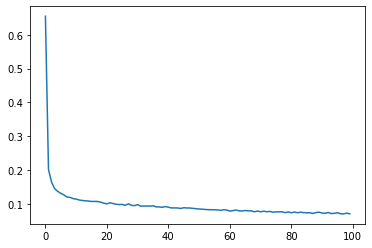

In [161]:
plt.plot(mlp_classifier2.loss_curve_)
plt.show()

In [162]:
mycols

['LATITUDE', 'LONGITUDE', 'STATE']

In [165]:
X = test_data[good_cols].drop(["STATE", "DISCOVERY_DATE", "DISCOVERY_TIME"], axis=1)
X = scaler.fit_transform(X.to_numpy())
Y = LabelEncoder().fit_transform(test_data[good_cols].STATE.values)

print(X.shape)
print(Y.shape)

(178402, 8)
(178402,)


In [166]:
result = mlp_classifier2.predict(X)

In [167]:
accuracy_score(result, Y)

0.8222553558816605

In [173]:
train_data.head()
len(train_data.columns)

30

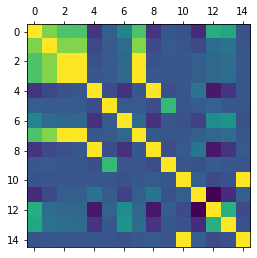

In [169]:
plt.matshow(train_data.corr())
plt.show()

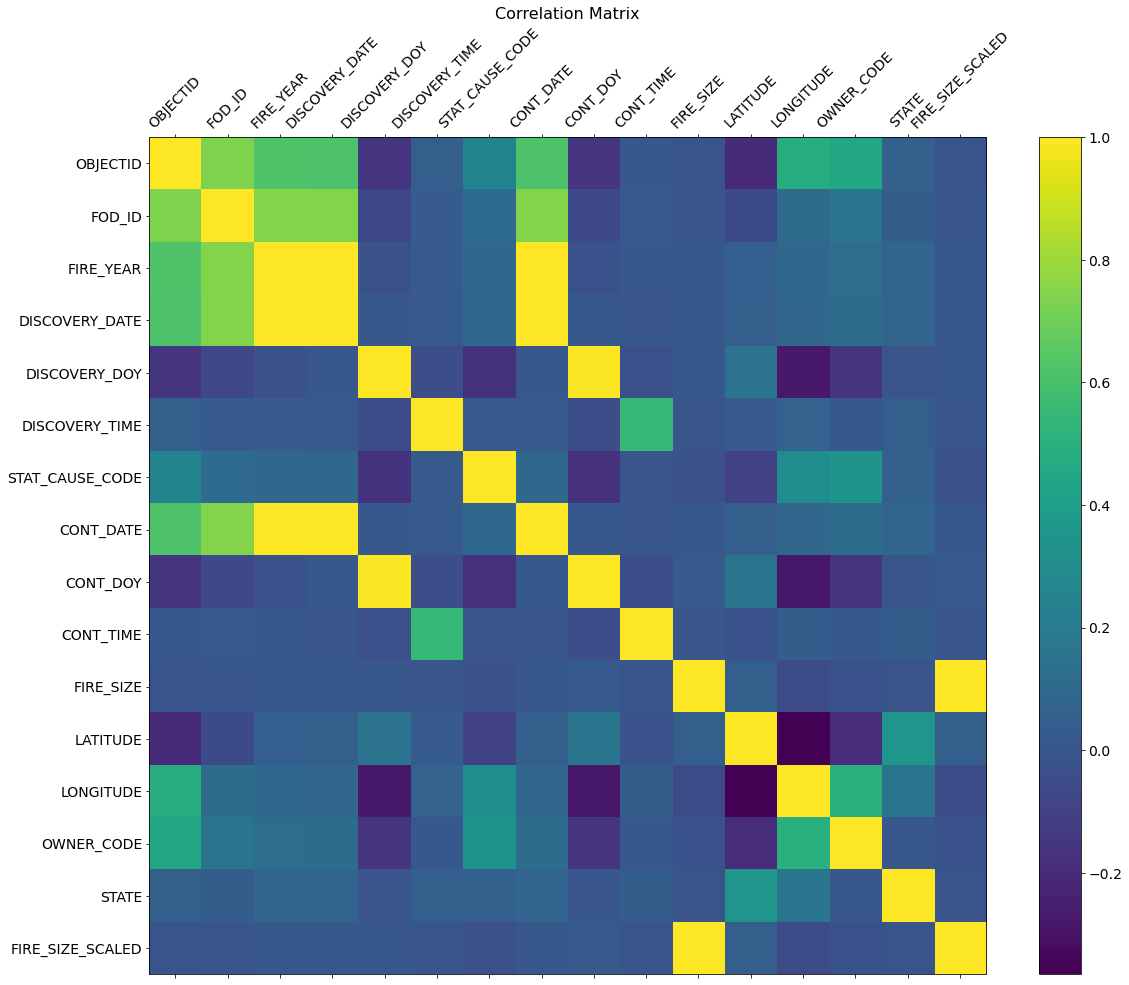

In [176]:
df = train_data
df["STATE"] = LabelEncoder().fit_transform(train_data.STATE.values)
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.savefig("corr_train_nandu.png")

Lets Predict the STAT_CAUSE_DESCR column with perceptron

In [115]:
train_data["STAT_CAUSE_DESCR"].value_counts()

Lightning            175776
Debris Burning       137803
Miscellaneous        117860
Arson                110947
Campfire              41415
Equipment Use         39101
Missing/Undefined     27944
Children              21947
Smoking               17972
Fireworks              8225
Railroad               6381
Powerline              6145
Structure              2089
Name: STAT_CAUSE_DESCR, dtype: int64

In [116]:
len(train_data[train_data["STAT_CAUSE_DESCR"] == "Missing/Undefined"])

27944

In [119]:
good_cols_new = ["FIRE_YEAR","DISCOVERY_DOY","DISCOVERY_TIME","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE","FIRE_SIZE","LATITUDE","LONGITUDE","STATE","DISCOVERY_DATE"]
df_model_new = train_data[good_cols_new]
df_model_new.sample(10)

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,STAT_CAUSE_CODE,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE
113179,2004,203,1519,203.0,1945,1.0,0.10,37.699400,-114.060300,NV,2453207.5
317323,2015,96,2145,96.0,2215,7.0,0.10,47.982200,-98.998600,ND,2457118.5
444989,2003,223,1551,224.0,1200,1.0,0.10,37.413900,-109.789800,UT,2452862.5
202947,1997,284,1609,284.0,1704,7.0,1.00,31.295117,-91.100120,MS,2450732.5
320391,1994,180,1730,180.0,2010,1.0,0.30,34.266700,-116.517500,CA,2449532.5
302731,2005,148,930,148.0,1200,1.0,0.10,41.883056,-122.903056,CA,2453518.5
531561,1993,312,1400,313.0,1000,4.0,0.10,45.815000,-117.756667,OR,2449299.5
270140,2015,154,1601,154.0,1800,13.0,0.25,31.557500,-110.459800,AZ,2457176.5
192521,2005,101,1230,101.0,1230,9.0,1.33,43.315801,-76.156288,NY,2453471.5
91701,1995,93,1645,93.0,1728,5.0,0.26,33.161600,-84.770400,GA,2449810.5


In [120]:
df_model_new["STATE"] = LabelEncoder().fit_transform(df_model_new.STATE.values)
df_model_new.sample(5)

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,STAT_CAUSE_CODE,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE
142778,2000,305,1334,305.0,1334,6.0,0.24,34.927300,-85.449800,10,2451848.5
612262,2010,178,1442,178.0,1659,13.0,1.30,32.523300,-104.256100,32,2455374.5
668190,2002,200,1628,200.0,1955,1.0,0.10,44.288300,-109.175700,51,2452474.5
469022,1992,214,1000,214.0,1300,4.0,0.10,47.340000,-120.923333,48,2448835.5
33702,1995,244,2000,244.0,2100,8.0,0.10,44.088333,-115.613333,13,2449961.5


Prepare data for our model

In [145]:
X = df_model_new.drop(["STAT_CAUSE_CODE"], axis=1)
Y = df_model_new["STAT_CAUSE_CODE"]
X.shape, Y.shape

((713605, 10), (713605,))

In [146]:
X.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE
0,2012,71,1916,71.0,1943,0.1,41.147000,-73.927000,34,2455997.5
1,2012,225,1702,225.0,1730,0.1,43.084444,-122.617778,37,2456151.5
2,2006,182,2240,183.0,1500,98.6,42.741900,-114.848900,13,2453917.5
3,2010,192,1403,192.0,1515,0.5,40.293300,-111.977500,45,2455388.5
4,2014,24,1246,24.0,1439,11.8,31.949458,-83.289372,10,2456681.5


In [147]:
Y.head()

0    9.0
1    4.0
2    1.0
3    9.0
4    5.0
Name: STAT_CAUSE_CODE, dtype: float64

In [148]:
# X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
# X.shape

X = scaler.fit_transform(X)
X.shape

(713605, 10)

In [150]:
Y.head()

0    9.0
1    4.0
2    1.0
3    9.0
4    5.0
Name: STAT_CAUSE_CODE, dtype: float64

In [151]:
classifier_scdescr = mlp_classifier2 = MLPClassifier(
    hidden_layer_sizes=(180,120,60),
    activation="relu",
    solver="adam",
    max_iter=100,
    verbose=True,
    learning_rate = "adaptive"
)

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [154]:
classifier_scdescr.fit(X_train, Y_train)

Iteration 1, loss = 1.65280339
Iteration 2, loss = 1.51306068
Iteration 3, loss = 1.47787529
Iteration 4, loss = 1.45818546
Iteration 5, loss = 1.44401131
Iteration 6, loss = 1.43348637
Iteration 7, loss = 1.42494921
Iteration 8, loss = 1.41722042
Iteration 9, loss = 1.41136819
Iteration 10, loss = 1.40561682
Iteration 11, loss = 1.40108543
Iteration 12, loss = 1.39727225
Iteration 13, loss = 1.39251136
Iteration 14, loss = 1.38865226
Iteration 15, loss = 1.38575720
Iteration 16, loss = 1.38230898
Iteration 17, loss = 1.37902236
Iteration 18, loss = 1.37727188
Iteration 19, loss = 1.37347405
Iteration 20, loss = 1.37136341
Iteration 21, loss = 1.36915534
Iteration 22, loss = 1.36724914
Iteration 23, loss = 1.36533160
Iteration 24, loss = 1.36317436
Iteration 25, loss = 1.36179967
Iteration 26, loss = 1.35978354
Iteration 27, loss = 1.35863548
Iteration 28, loss = 1.35706839
Iteration 29, loss = 1.35572937
Iteration 30, loss = 1.35377874
Iteration 31, loss = 1.35246514
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(180, 120, 60), learning_rate='adaptive',
              max_iter=100, verbose=True)

In [157]:
prediction_new = classifier_scdescr.predict(X_test)
accuracy_score(prediction_new, Y_test)

0.5648853357249459